In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Go to your Google Colab project file and run the following commands:

1) ! pip install -q kaggle

2) from google.colab import files

files.upload()

Choose the kaggle.json file that you downloaded
3) ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

Make directory named kaggle and copy kaggle.json file there.
4) ! chmod 600 ~/.kaggle/kaggle.json

Change the permissions of the file.
5) ! kaggle datasets list
- That's all ! You can check if everything's okay by running this command.

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"achalgawande","key":"bcdc17ef002cd909fa5436b5aee9d3d3"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          19041        381  0.9411765        
sahirmaharajj/electric-vehicle-population-size-2024         Electric Vehicle Population by Country (2024)  275KB  2024-03-30 19:16:06           1028         30  1.0              
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification               56KB  2024-03-28 15:02:22           1549         33  1.0              
bhavikjikadara/student-study-performance     

Download Data
! kaggle competitions download -c 'name-of-competition'

Use unzip command to unzip the data:

For example,

Create a directory named train,

! mkdir train

unzip train data there,

! unzip train.zip -d train

In [ ]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 187MB/s]


In [ ]:
!unzip 'digit-recognizer.zip'

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# let's convert these pandas dataframe to numpy arrays so that we can apply linear
#  algebra to these dataset

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([9, 3, 2, ..., 2, 7, 2])

In [ ]:
X_train[:, 0].shape

(784,)

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print('The accuracy is: ')
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 3 1 ... 2 8 3] [9 3 2 ... 2 7 2]
0.14282926829268291
Iteration:  10
[9 5 4 ... 2 8 3] [9 3 2 ... 2 7 2]
0.19646341463414635
Iteration:  20
[9 5 4 ... 2 8 3] [9 3 2 ... 2 7 2]
0.25090243902439024
Iteration:  30
[4 5 4 ... 2 7 8] [9 3 2 ... 2 7 2]
0.3114390243902439
Iteration:  40
[4 5 4 ... 5 7 8] [9 3 2 ... 2 7 2]
0.369
Iteration:  50
[4 5 4 ... 5 7 8] [9 3 2 ... 2 7 2]
0.4346341463414634
Iteration:  60
[4 5 4 ... 0 7 1] [9 3 2 ... 2 7 2]
0.484390243902439
Iteration:  70
[4 5 5 ... 0 7 1] [9 3 2 ... 2 7 2]
0.5235609756097561
Iteration:  80
[4 5 5 ... 0 7 1] [9 3 2 ... 2 7 2]
0.5592682926829269
Iteration:  90
[4 5 5 ... 0 7 1] [9 3 2 ... 2 7 2]
0.5904878048780487
Iteration:  100
[4 5 5 ... 0 7 1] [9 3 2 ... 2 7 2]
0.6158292682926829
Iteration:  110
[4 3 5 ... 6 7 1] [9 3 2 ... 2 7 2]
0.6393170731707317
Iteration:  120
[4 3 5 ... 6 7 1] [9 3 2 ... 2 7 2]
0.6593658536585366
Iteration:  130
[4 3 5 ... 6 7 2] [9 3 2 ... 2 7 2]
0.6768780487804879
Iteration:  140
[4 3 5 ... 6

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, cmap='gray', interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  9


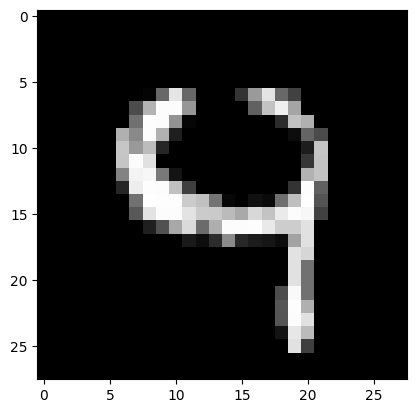

Prediction:  [3]
Label:  3


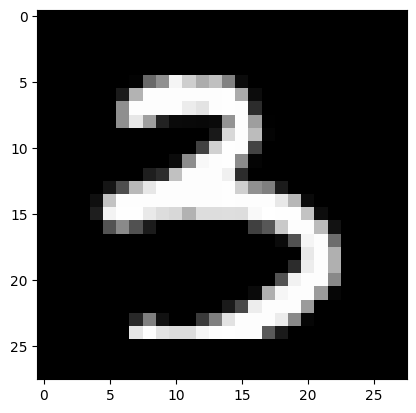

Prediction:  [2]
Label:  2


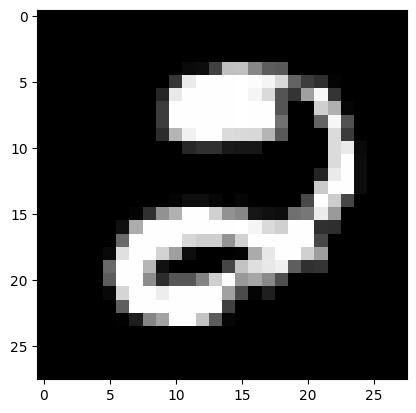

Prediction:  [3]
Label:  3


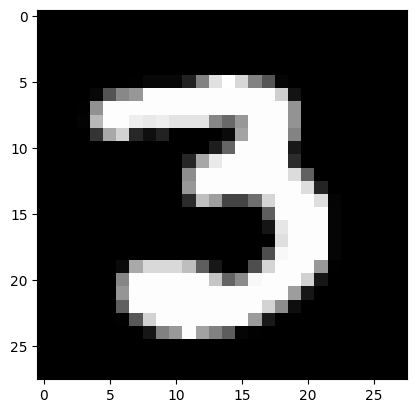

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)

In [ ]:
get_accuracy(dev_predictions, Y_dev)

The accuracy is: 
[8 7 3 3 4 1 5 1 5 1 4 5 9 3 5 7 4 1 6 9 5 4 7 4 7 3 8 3 8 8 3 1 3 8 2 9 3
 2 5 3 7 6 4 2 2 6 6 1 3 1 1 1 4 6 0 6 4 3 6 5 1 4 1 8 1 5 1 2 3 4 1 9 5 0
 0 2 3 0 6 1 8 8 8 3 6 0 7 3 9 7 4 3 2 7 3 7 1 9 5 6 1 1 2 7 0 9 3 2 3 8 6
 4 4 7 1 2 7 2 6 7 6 5 6 6 9 0 4 4 7 1 3 1 8 9 1 4 2 4 9 7 1 4 3 1 3 6 5 9
 9 5 1 7 2 2 3 0 4 4 7 3 1 9 6 3 2 3 2 5 9 7 4 9 8 3 3 4 9 3 4 5 3 6 7 3 3
 0 7 0 2 4 3 1 4 7 4 4 2 9 4 4 5 9 6 3 0 7 5 6 7 5 5 1 7 2 7 6 1 5 4 9 6 0
 9 7 9 8 6 6 1 0 2 7 7 9 1 0 1 2 7 7 8 8 2 4 1 6 6 2 6 9 1 9 2 5 3 2 3 1 6
 0 6 9 9 4 8 5 6 7 4 9 8 1 4 9 4 6 3 3 8 9 0 0 9 2 8 2 3 1 7 4 5 9 7 3 1 6
 3 8 4 0 6 1 8 9 0 1 7 1 2 3 0 9 4 4 7 8 3 3 8 0 5 4 9 1 7 2 7 2 0 6 9 2 6
 5 2 6 9 0 6 2 7 2 3 6 0 8 9 6 3 7 0 2 4 9 4 0 9 1 7 3 2 3 4 9 2 8 7 7 1 1
 2 9 9 4 1 6 6 4 8 9 5 5 9 7 4 8 7 9 5 2 5 2 9 7 7 5 0 6 2 4 3 1 4 5 4 9 7
 3 8 3 2 1 7 7 8 0 9 0 1 3 4 2 2 9 0 7 2 3 6 0 4 9 7 9 5 9 0 2 3 4 9 3 5 8
 2 9 0 7 7 6 5 9 1 8 8 6 6 4 8 0 4 1 5 3 3 2 9 6 2 2 3 4 7 4 2 7 6 1 0 9 1
 5 8 7 

0.855